In [17]:
## parameters  key and bpm have a least 20% infulence over the songs streams
# predict key and bpm regargding all the other parameters
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import date
from sklearn import svm


data = pd.read_csv('/content/drive/MyDrive/AGH/PythonForMLGoogleColab/MAIN_DATASET_spotify2023.csv')


data.head()
encoder = LabelEncoder()
data["key"] = encoder.fit_transform(data["key"])
data["mode"] = encoder.fit_transform(data["mode"])
released_day_of_year = []

for i in range(len(data.index)):
    day_of_year = date(data['released_year'][i],
                    data['released_month'][i],
                    data['released_day'][i]).timetuple().tm_yday
    released_day_of_year.append(day_of_year)

# add new series to dataframe
data.insert(len(data.columns), "released_day_of_year", released_day_of_year, True)

data = data[["released_day_of_year", 'bpm','key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]


data

,released_day_of_year,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,195,125,2,0,80,89,83,31,0,8,4
1,82,92,3,0,71,61,74,7,0,10,4
2,181,138,7,0,51,32,53,17,0,31,6
3,235,170,0,0,55,58,72,11,0,11,15
4,138,144,0,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...
947,307,144,0,0,60,24,39,57,0,8,3
948,294,166,8,0,42,7,24,83,1,12,6
949,307,92,3,0,80,81,67,4,0,8,6
950,293,97,3,0,82,67,77,8,0,12,5


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
X = data.drop(["bpm", "key"], axis = 1)
y = data["bpm"]

train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2
SEED = 42

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=SEED)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=SEED)

print(f"Percent of Train: {train_ratio*100}%, Validation: {validation_ratio*100}% and Test dataset: {test_ratio*100}% ")

Percent of Train: 60.0%, Validation: 20.0% and Test dataset: 20.0% 


## Task 1,2

In [20]:
reg = LinearRegression()
weights_train = np.ones_like(y_train)
np.random.seed(42)
random_weights = np.random.rand(len(y_train))

reg.fit(x_train, y_train, sample_weight=weights_train)
y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_val)

cv_values = [3,5,10]
for k in cv_values:
    scores = cross_val_score(reg, x_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mean of 3-folds cross_validation: 27.23594362909591
mean of 5-folds cross_validation: 27.123959238772443
mean of 10-folds cross_validation: 27.109408194043617

Rmse_val: 30.356422374397155, Mean_val:  921.5123793728003
Rmse: 26.60437794888637, Mean:  707.7929260471914


##  Task3 neural regresor

In [21]:


reg = MLPRegressor(hidden_layer_sizes=(5, 6, 5), random_state=50, max_iter=50, solver='lbfgs')
reg.fit(x_train, y_train)
y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_val)

cv_values = [3,5,10]
for k in cv_values:
    scores = cross_val_score(reg, x_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mean of 3-folds cross_validation: 27.404914101734814
mean of 5-folds cross_validation: 27.363923543984093
mean of 10-folds cross_validation: 27.289784265368432

Rmse_val: 31.018043240056127, Mean_val:  962.1190064419916
Rmse: 27.370891136694446, Mean:  749.1656816167786


## Grid Search

In [22]:
parameters = {'max_iter' : [50,100,150,400,800],'solver':('lbfgs', 'sgd', 'adam'), 'hidden_layer_sizes':[(10, 5, 5), (5, 10, 5), (5, 5, 10),(5,5), (5,10)], "random_state" :[50,100,150,200]}
#parameters = {'solver':('lbfgs', 'sgd', 'adam'),  "random_state" :[50]}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_)
print(grid_search.best_score_)# to get the best estimator
#print(grid_search.cv_results_) # to get all results

{'hidden_layer_sizes': (5, 5), 'max_iter': 800, 'random_state': 100, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=(5, 5), max_iter=800, random_state=100,
             solver='lbfgs')
-26.98434127317869


## Random Search

In [37]:

logistic = MLPRegressor(hidden_layer_sizes=(5, 5), random_state=100, max_iter = 800, solver = 'lbfgs')
distributions = dict(alpha=uniform(loc=0, scale=8), solver =['lbfgs', 'sgd', 'adam'])
Random_search = RandomizedSearchCV(logistic, distributions, random_state=0, scoring='neg_root_mean_squared_error')
Random_search.fit(x_train, y_train)
print(Random_search.best_params_) # to get the best parameters
print(Random_search.best_estimator_)
print(Random_search.best_score_)

{'alpha': 0.6970343976123257, 'solver': 'lbfgs'}
MLPRegressor(alpha=0.6970343976123257, hidden_layer_sizes=(5, 5), max_iter=800,
             random_state=100, solver='lbfgs')
-27.29305473730208


## Task 4  Polynomial reggresor

In [27]:
# Create polynomial features
poly_features = PolynomialFeatures(degree = 2) #4 poziom najlepszy
X_train_poly = poly_features.fit_transform(x_train)
X_val_poly = poly_features.fit_transform(x_val)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_pred_train = reg.predict(X_train_poly)
y_pred = reg.predict(X_val_poly)

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

cv_values = [3,5,10]
for k in cv_values:
    scores_val_score = cross_val_score(reg, x_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores_val_score.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")


scores = cross_validate(reg, x_train, y_train, cv=5,scoring=['r2','neg_mean_absolute_error'])
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")
#print(scores['fit_time'])
#print(scores['score_time'])


rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")


mean of 3-folds cross_validation: 27.23594362909591
mean of 5-folds cross_validation: 27.123959238772443
mean of 10-folds cross_validation: 27.109408194043617

r2: 0.014351357832488287
mean_abs_error: -22.200058706395225

Rmse_val: 31.289537393574367, Mean_val:  979.0351503038886
Rmse: 24.805712317874985, Mean:  615.3233635971748


## SVM

In [28]:

# Kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
#linear the best but the longest so most complicated

reg = SVR(C=2, epsilon=0.2, kernel='poly', max_iter=50)
reg.fit(x_train, y_train)

y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_val)

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

cv_values = [3,5,10]
for k in cv_values:
    scores_val_score = cross_val_score(reg, x_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores_val_score.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation rmse: {-mean_cross}")

scores = cross_validate(reg, x_train, y_train, cv=5,scoring=['r2','neg_mean_absolute_error'])

print(f"\nr2: {scores['test_r2'].mean()}")
print(f"mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")



rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mae = mean_absolute_error(y_val, y_pred)
print("\nMean Absolute Error:", mae)



mean of 3-folds cross_validation rmse: 32.21798768486267
mean of 5-folds cross_validation rmse: 33.06007211673905
mean of 10-folds cross_validation rmse: 32.507364497594935

r2: -0.4750607827056152
mean_abs_error: -26.540641870219144

Rmse_val: 35.369807379057036, Mean_val:  1251.0232740315973
Rmse: 33.41268589947712, Mean:  1116.4075790171169

Mean Absolute Error: 27.388374535538595


In [29]:
#GridSearch
parameters = {'max_iter' : [50,100,150,400,800],'kernel':('linear', 'poly', 'rbf', 'sigmoid')}
#parameters = {'solver':('lbfgs', 'sgd', 'adam'),  "random_state" :[50]}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(x_train, y_train)

print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_)
print(grid_search.best_score_)# to get the best estimator
#print(grid_search.cv_results_) # to get all results


{'kernel': 'rbf', 'max_iter': 400}
SVR(C=2, epsilon=0.2, max_iter=400)
-27.219170513708185


In [38]:
#RandomSearch
logistic = SVR( epsilon=0.2, kernel='rbf', max_iter=400, degree = 2)
distributions = dict(C=uniform(loc=0, scale=10), coef0 =uniform(loc=0, scale=10), epsilon= uniform(loc=0, scale=10))
Random_search = RandomizedSearchCV(logistic, distributions, random_state=0, scoring='neg_root_mean_squared_error')
Random_search.fit(x_train, y_train)
print(Random_search.best_params_) # to get the best parameters
print(Random_search.best_estimator_)
print(Random_search.best_score_)

{'C': 7.9915856421672355, 'coef0': 4.6147936225293185, 'epsilon': 7.805291762864554}
SVR(C=7.9915856421672355, coef0=4.6147936225293185, degree=2,
    epsilon=7.805291762864554, max_iter=400)
-27.10507511107233


## SVM model with best  parameters

In [40]:
reg = SVR(C=2, epsilon=0.2, kernel='poly', max_iter=50)
reg.fit(x_train, y_train)

y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("\nR2:", r2)


Mean Absolute Error: 24.44820754316577

R2: -0.30815924326693644


# Final Assessment of the model

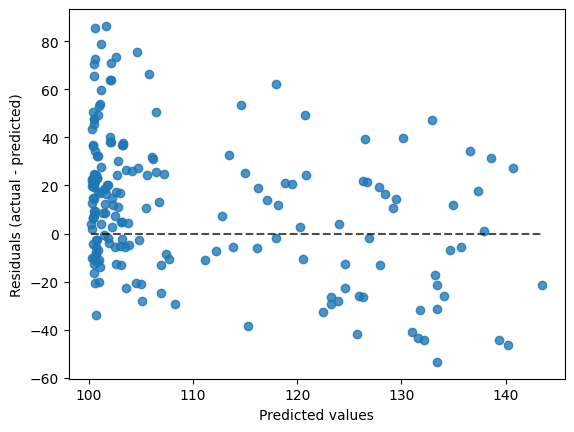

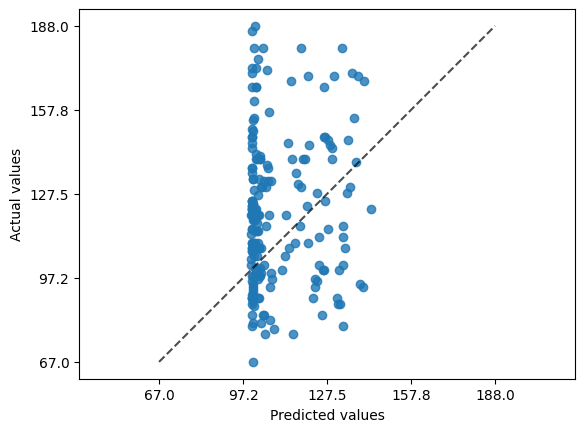

In [41]:
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import confusion_matrix
PredictionErrorDisplay.from_estimator(reg, x_test, y_test,
kind="residual_vs_predicted")
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred,
kind="actual_vs_predicted")


## Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
clf_mlp1 = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier(max_iter=5000, random_state=1, solver='adam', alpha =0.0001))])
clf_mlp1.fit(x_train, y_train)

y_pred_train = clf_mlp1.predict(x_train)
y_pred = clf_mlp1.predict(x_val)


acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)
print(f"Accuracy train: {acc_train}, accuracy validation: {acc_val}")


Accuracy train: 1.0, accuracy validation: 0.031578947368421054
